In [ ]:
# 마운트(mount) : 코랩과 구글드라이브 연결

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.read_csv('/content/drive/MyDrive/dl_data/data/ThoraricSurgery3.csv')

,1,2.88,2.16,1.1,0,0.1,0.2,1.2,1.3,3,0.3,0.4,0.5,1.4,0.6,60,0.7
0,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
1,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
2,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
3,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1
4,2,2.48,1.88,1,0,0,0,1,0,0,0,0,0,0,0,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,1,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,63,0
465,2,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,61,0
466,2,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,52,0
467,2,1.96,1.68,1,0,0,0,1,1,1,0,0,0,1,0,79,0


In [ ]:
data_set = np.loadtxt('/content/drive/MyDrive/dl_data/data/ThoraricSurgery3.csv', delimiter=',')

In [ ]:
data_set

array([[ 1.  ,  2.88,  2.16, ...,  0.  , 60.  ,  0.  ],
       [ 2.  ,  3.4 ,  1.88, ...,  0.  , 51.  ,  0.  ],
       [ 2.  ,  2.76,  2.08, ...,  0.  , 59.  ,  0.  ],
       ...,
       [ 2.  ,  3.04,  2.08, ...,  0.  , 52.  ,  0.  ],
       [ 2.  ,  1.96,  1.68, ...,  0.  , 79.  ,  0.  ],
       [ 2.  ,  4.72,  3.56, ...,  0.  , 51.  ,  0.  ]])

In [ ]:
data_set.shape

(470, 17)

In [ ]:
X = data_set[:, 0:16]
y = data_set[:, 16] # target 열

In [ ]:
X
y

array([0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [ ]:
# 딥러닝 모델 구조 설계(수동)
from tensorflow.keras.models import Sequential  # 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.layers import Dense       # 데이터를 다루는데 필요한 라이브러리를 불러옵니다.

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(32, input_dim=16, activation='relu'))
# 16개의 특징값으로 구성된 470건의 데이터를 32개의 일반화된 특징을 찾는다(표현한다)
# 32가지의 선(수평, 수직, 둥근 ...)
model.add(Dense(8, activation='relu'))
# 32개의 일반화된 특징을 압축하여 8가지 특징으로 표현한다
# 32가지 선의 조합으로 구성된 8가지 도형(사각형, 오각형, ...)

In [ ]:
model.add(Dense(1, activation='sigmoid'))
# layer 추가할 때마다 .add 사용
# 8가지 도형의 조합으로 표현된 형상(얼굴, 눈, 코, ...)

In [ ]:
model.summary()
# 16 * 32 + 32
# 출력노드 1개, 32 * 1 + 1

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 8)                 264       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 817 (3.19 KB)
Trainable params: 817 (3.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 딥러닝 모델이란? 깊은 신경망(히든 계층이 2개 이상)으로 학습된
# 모델의 가중치 변수로 표현된 함수식

In [ ]:
#모델 실행

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 2진분류 binary_crossentropy,

In [ ]:
hist = model.fit(X, y, epochs=10, batch_size=20)
# epochs : 학습횟수(현재 470건 데이터 전체가 훈련(학습)이 진행된게 1epochs)
# batch_size : 1번의 훈련(학습)에 사용되는 데이터의 건수,
# batch_size 건수만큼의 데이터에 대한 예측 결과와 실제 결과의 차이인 에러 계산 -> 에러를 줄이기 위해 역전파를 1회 수행하며 가중치가 업데이트
# 1 ephoch(470)건에는 batch_size=20 이면 batch가 총 23번 일어남(학습이 23번. 23.5)
# => 역전파가 23번 수행
# 하이퍼퍼러미터

Epoch 1/10
24/24 [==============================] - 1s 2ms/step - loss: 1.3958 - accuracy: 0.5979
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 0.5318 - accuracy: 0.8298
Epoch 3/10
24/24 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.8468
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.8511
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8511
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8489
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8489
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8489
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.8511
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8511


In [ ]:
X.shape

(470, 16)

In [ ]:
# 지난주 복습

In [ ]:
# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [ ]:
# 5시간 공부했을 때 몇점을 받을까 예측
# 선형회귀 모델
# 모델의 예측값과 실제값의 차이를 최소로 하는 직선

In [ ]:
#x의 평균값을 구합니다.
mx = np.mean(x)

#y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 5.0
y의 평균값: 90.5


In [ ]:
# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


In [ ]:
# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y절편 b 를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a =", a)
print("y절편 b =", b)

기울기 a = 2.3
y절편 b = 79.0


In [ ]:
fake_a = a
fake_b = b

In [ ]:
# y=ax + b에 가상의 a,b 값을 대입한 결과를 출력하는 함수입니다.
def predict(x):
    return fake_a * x + fake_b # pred_y = 2.3 * x + 79.0

# 예측 값이 들어갈 빈 리스트를 만듭니다.
predict_result = []

# 모든 x값을 한 번씩 대입하여 predict_result 리스트를 완성합니다.
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=84
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=93
공부시간=8, 실제점수=97, 예측점수=97


In [ ]:
predict(5) # 90.5로 예상

90.5

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 경사하강법

In [ ]:
x
y

array([81, 93, 91, 97])

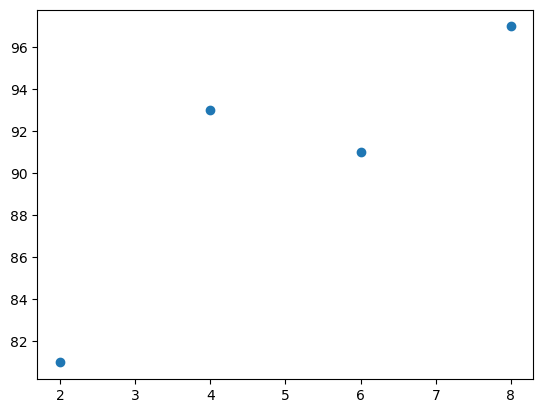

In [ ]:
plt.scatter(x, y)

In [ ]:
# y = ax + b
# a = 기울기(0), b : y절편(0)
# 기울기 a와 절편 b의 값을 초기화
a = 0
b = 0

In [ ]:
# 학습률을 정합니다.
lr = 0.01

In [ ]:
#몇 번 반복될지를 설정합니다.
epochs = 2001

In [ ]:
import time

epoch=0, 기울기=9.2800, 절편=1.8100


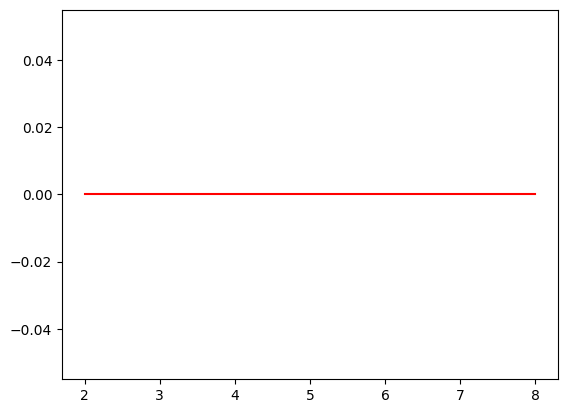

epoch=100, 기울기=11.5301, 절편=23.9186


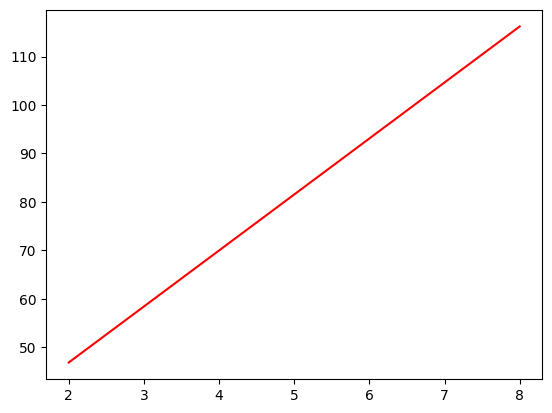

epoch=200, 기울기=8.9703, 절편=39.1944


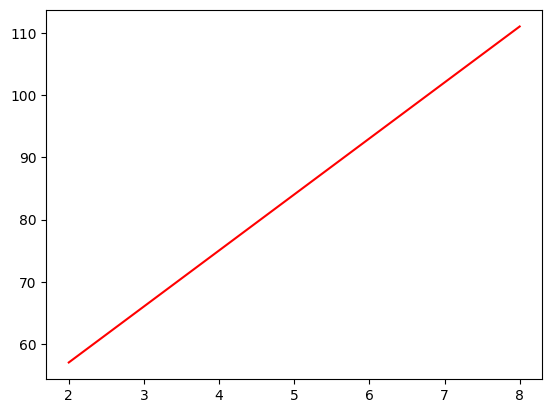

epoch=300, 기울기=7.1204, 절편=50.2337


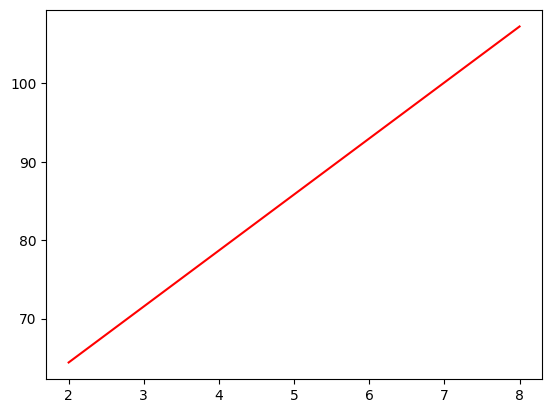

epoch=400, 기울기=5.7836, 절편=58.2115


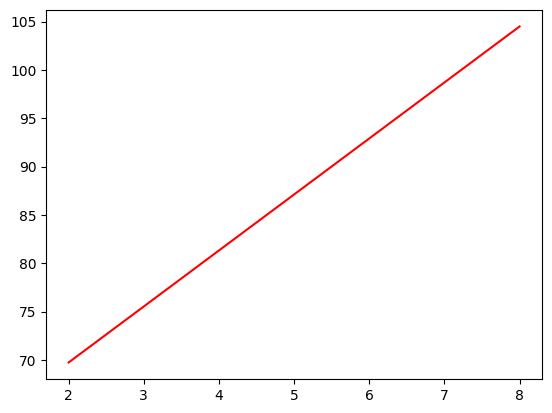

epoch=500, 기울기=4.8175, 절편=63.9768


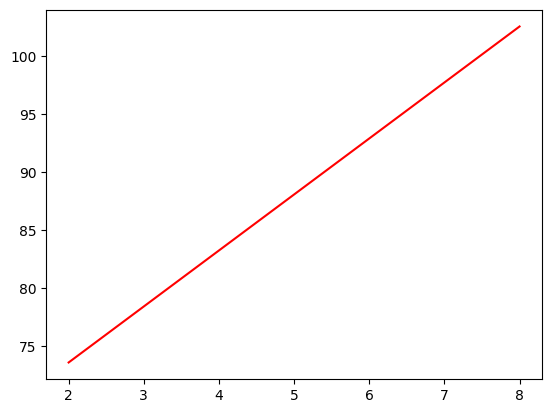

epoch=600, 기울기=4.1193, 절편=68.1432


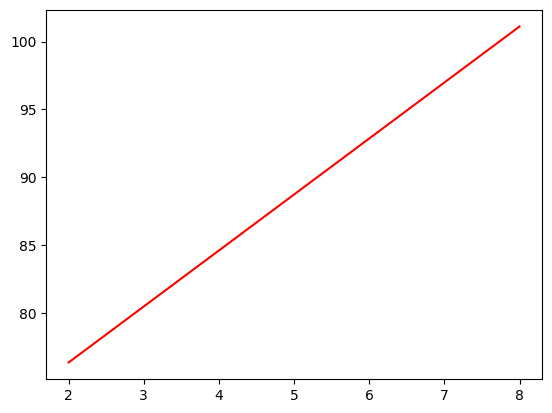

epoch=700, 기울기=3.6148, 절편=71.1541


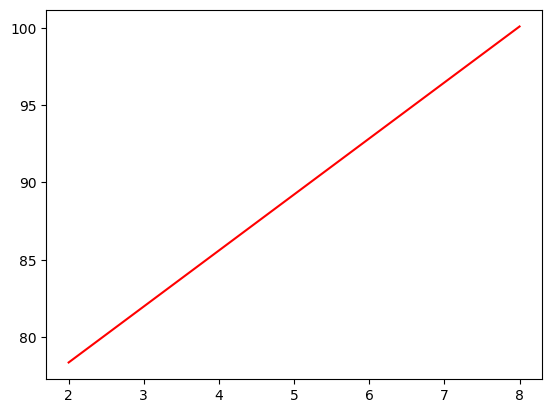

epoch=800, 기울기=3.2501, 절편=73.3300


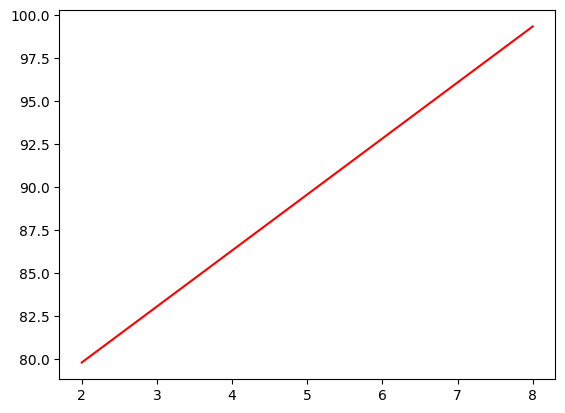

epoch=900, 기울기=2.9866, 절편=74.9025


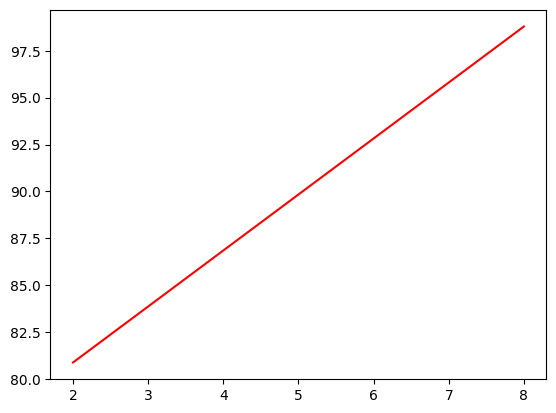

epoch=1000, 기울기=2.7962, 절편=76.0388


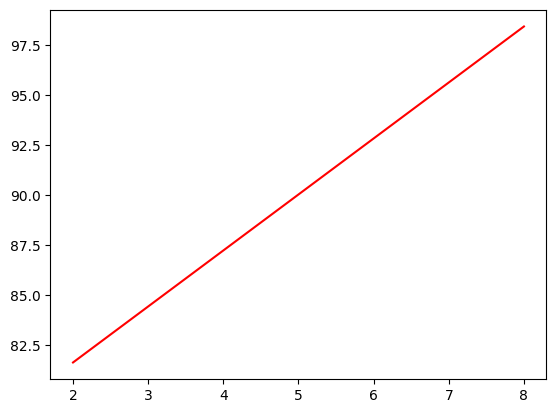

epoch=1100, 기울기=2.6586, 절편=76.8601


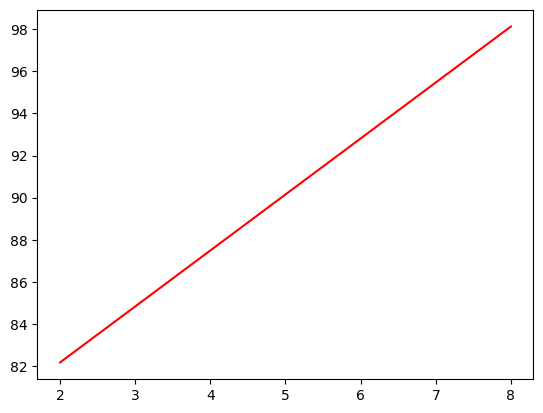

epoch=1200, 기울기=2.5591, 절편=77.4535


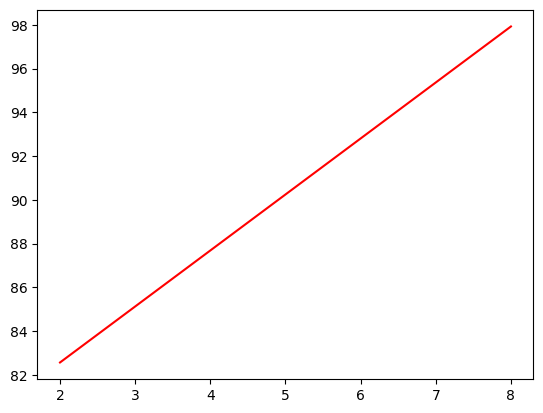

epoch=1300, 기울기=2.4873, 절편=77.8824


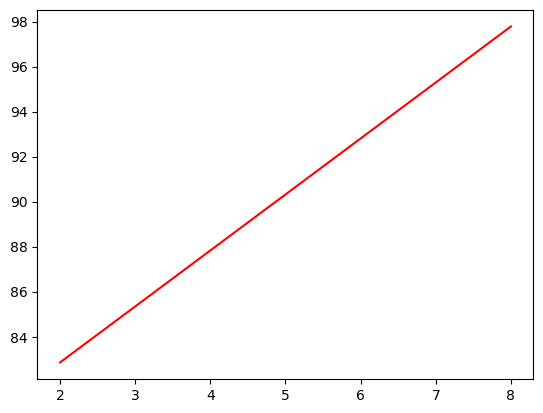

epoch=1400, 기울기=2.4353, 절편=78.1924


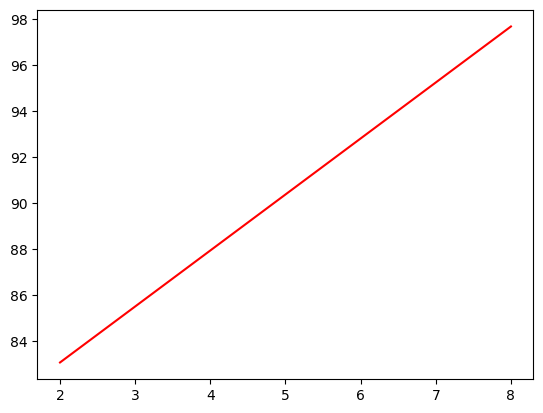

epoch=1500, 기울기=2.3978, 절편=78.4163


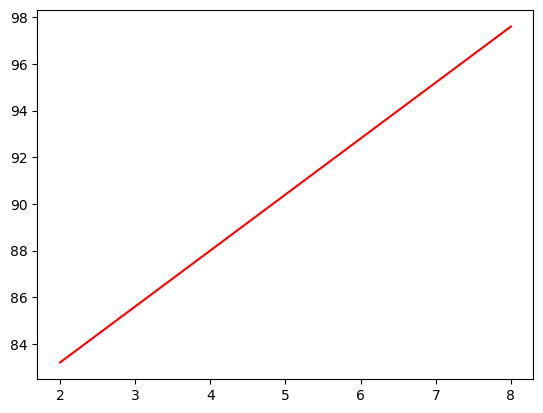

epoch=1600, 기울기=2.3707, 절편=78.5782


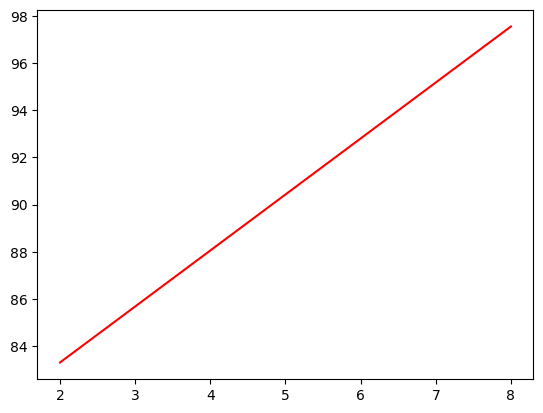

epoch=1700, 기울기=2.3511, 절편=78.6952


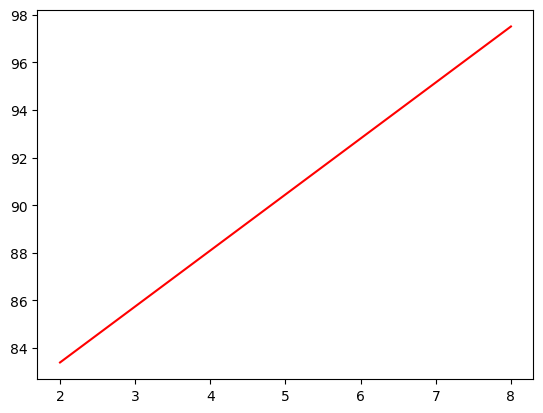

epoch=1800, 기울기=2.3369, 절편=78.7797


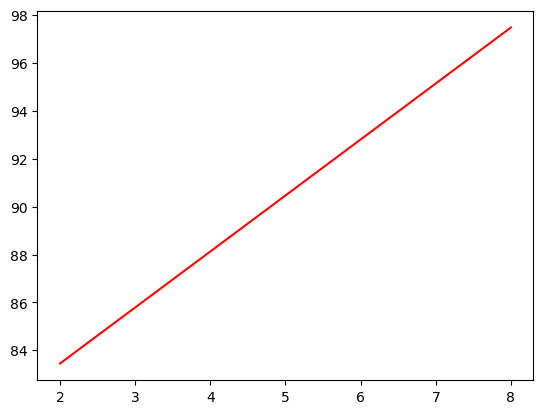

epoch=1900, 기울기=2.3267, 절편=78.8408


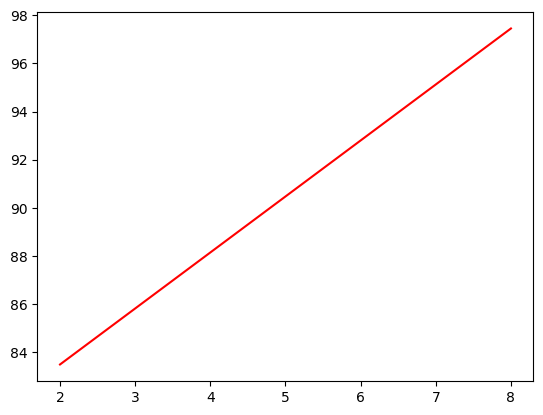

epoch=2000, 기울기=2.3193, 절편=78.8850


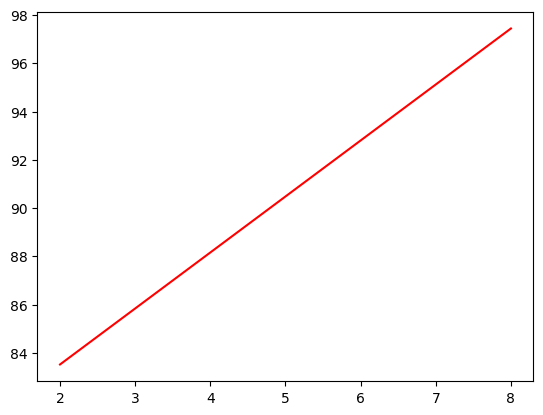

In [ ]:

# x 값이 총 몇 개인지 셉니다.
n=len(x)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복

    y_pred = a * x + b                   # 예측 값을 구하는 식입니다.
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.

    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        plt.plot(x, y_pred, 'r')
        plt.show()
        time.sleep(0.5)

In [ ]:
# 기울기 a = 2.3
# y절편 b = 79.0

In [ ]:
a

2.319277883209714

In [ ]:
b

78.88495783757605

In [ ]:
y_pred = a * x + b

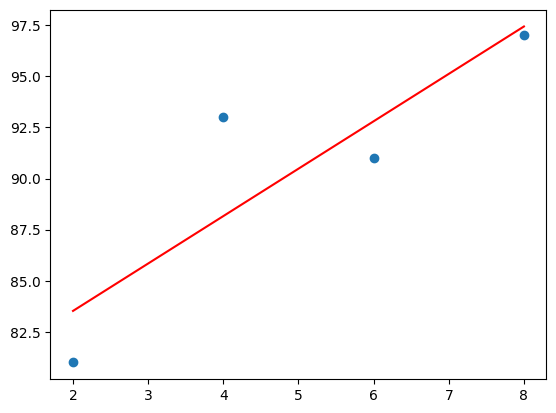

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()
# 실제값, 최적화된 예측 모델

In [ ]:
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97])

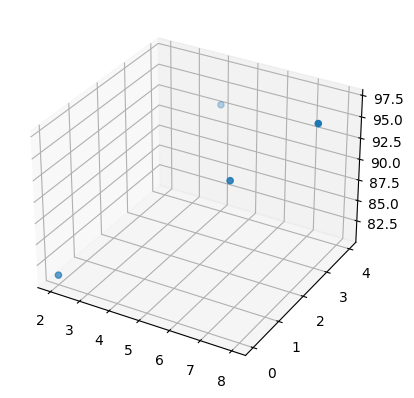

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

In [ ]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a1 = 0
a2 = 0
b = 0

#학습률을 정합니다.
lr = 0.01

#몇 번 반복될지를 설정합니다.
epochs = 2001

In [ ]:
# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다.
n=len(x1)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복

    y_pred = a1 * x1 + a2 * x2 + b       #예측 값을 구하는 식을 세웁니다
    error = y - y_pred                   #실제 값과 비교한 오차를 error로 놓습니다.

    a1_diff = (2/n) * sum(-x1 * (error)) # 오차함수를 a1로 편미분한 값입니다.
    a2_diff = (2/n) * sum(-x2 * (error)) # 오차함수를 a2로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차함수를 b로 편미분한 값입니다.

    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a1, a2, b 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [ ]:
# ypred = 1.5191 * x1 + 2.2923 * x2 + 77.7260
y

array([81, 93, 91, 97])

In [ ]:
y_pred

array([80.76387645, 92.97153922, 91.42520875, 96.7558749 ])

In [ ]:
# 딥러닝 프레임웍(텐서플로우 keras)으로 선형 회귀 모델 생성

In [ ]:
#텐서플로의 케라스 API에서 필요한 함수들을 불러 옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(1, input_dim=1, activation='linear'))
# ypred = w1 * x1 + b

In [ ]:
# 오차 수정을 위해 경사 하강법(sgd)을, 오차의 정도를 판단하기 위해 평균 제곱 오차(mse)를 사용합니다.
model.compile(optimizer='sgd', loss='mse')

In [ ]:
# 오차를 최소화하는 과정을 2000번 반복합니다.
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 600ms/step - loss: 9668.1045
Epoch 2/2000
1/1 [==============================] - 0s 30ms/step - loss: 2247.0901
Epoch 3/2000
1/1 [==============================] - 0s 17ms/step - loss: 1151.8188
Epoch 4/2000
1/1 [==============================] - 0s 15ms/step - loss: 985.6757
Epoch 5/2000
1/1 [==============================] - 0s 12ms/step - loss: 956.0324
Epoch 6/2000
1/1 [==============================] - 0s 12ms/step - loss: 946.4714
Epoch 7/2000
1/1 [==============================] - 0s 14ms/step - loss: 939.8937
Epoch 8/2000
1/1 [==============================] - 0s 16ms/step - loss: 933.7878
Epoch 9/2000
1/1 [==============================] - 0s 15ms/step - loss: 927.7845
Epoch 10/2000
1/1 [==============================] - 0s 25ms/step - loss: 921.8292
Epoch 11/2000
1/1 [==============================] - 0s 21ms/step - loss: 915.9138
Epoch 12/2000
1/1 [==============================] - 0s 19ms/step - loss: 910.0370
Epoch 13/

1/1 [==============================] - 0s 311ms/step


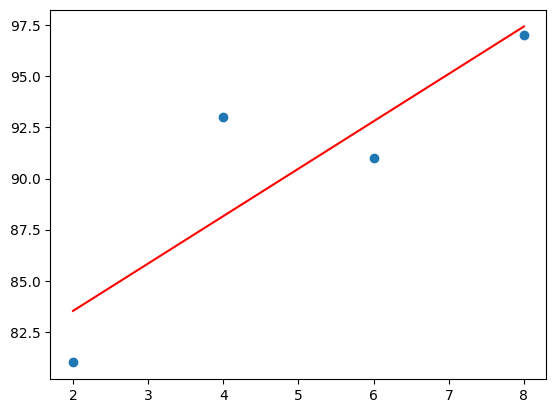

In [ ]:
plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')    # 예측 결과를 그래프로 나타냅니다.
plt.show()

In [ ]:
model.get_weights() # 가중치, y절편

[array([[2.3192782]], dtype=float32), array([78.88496], dtype=float32)]

In [ ]:
model.predict([11])

1/1 [==============================] - 0s 128ms/step


array([[104.39702]], dtype=float32)

In [ ]:
# x = [공부시간, 과외시간]
# y = [점]
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97])

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense( 1  ,input_dim=2, activation='linear'))

In [ ]:
model.compile(optimizer='sgd', loss='mse')

In [ ]:
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 518ms/step - loss: 8446.7529
Epoch 2/2000
1/1 [==============================] - 0s 15ms/step - loss: 1453.2378
Epoch 3/2000
1/1 [==============================] - 0s 17ms/step - loss: 955.9289
Epoch 4/2000
1/1 [==============================] - 0s 15ms/step - loss: 915.5321
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 907.3048
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 901.3748
Epoch 7/2000
1/1 [==============================] - 0s 17ms/step - loss: 895.6410
Epoch 8/2000
1/1 [==============================] - 0s 17ms/step - loss: 889.9551
Epoch 9/2000
1/1 [==============================] - 0s 13ms/step - loss: 884.3066
Epoch 10/2000
1/1 [==============================] - 0s 13ms/step - loss: 878.6948
Epoch 11/2000
1/1 [==============================] - 0s 13ms/step - loss: 873.1190
Epoch 12/2000
1/1 [==============================] - 0s 14ms/step - loss: 867.5790
Epoch 13/20

In [ ]:
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))

1/1 [==============================] - 0s 115ms/step
7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다


<ipython-input-113-951dca87f293>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))


In [ ]:
# 로지스틱 회귀 모델
# 합격, 불합격

In [ ]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])
# 1 : 합격, 0 : 불합격

In [ ]:
# 6시간30분 공부 -> 합격? 불합격?

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(1 ,input_dim=1, activation='sigmoid')) # sigmoid : 0 / 1

In [ ]:
model.compile(optimizer='sgd' ,loss='binary_crossentropy')

In [ ]:
model.fit(x, y, epochs=5000)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 9ms/step - loss: 0.2577
Epoch 2502/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.2577
Epoch 2503/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.2576
Epoch 2504/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2576
Epoch 2505/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2575
Epoch 2506/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.2575
Epoch 2507/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.2574
Epoch 2508/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.2574
Epoch 2509/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.2573
Epoch 2510/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.2573
Epoch 2511/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.2573
Epoch 2512/5000
1/1 [==============================] - 0s 14ms/step 

1/1 [==============================] - 0s 74ms/step


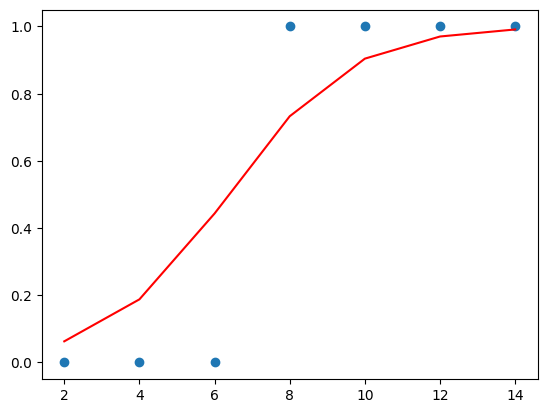

In [ ]:
#그래프로 확인해 봅니다.

plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')
plt.show()

In [ ]:
#임의의 학습시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.

hour = 7
prediction = model.predict([hour])

print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다" % (hour, prediction * 100))

1/1 [==============================] - 0s 68ms/step
7시간을 공부할 경우, 합격 예상 확률은 59.6%입니다


<ipython-input-122-5306a1178304>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다" % (hour, prediction * 100))


In [ ]:
# 연습문제
# 90, 90, 90 몇 점?
# 80, 85, 80 몇 점?
# 93, 92, 70 몇 점?
# 텐서플로우, 파이썬 2가지 버전으로

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
test = np.loadtxt('/content/drive/MyDrive/dl_data/homework/data-01-test-score.csv', delimiter=',')
test

array([[ 80.,  79.,  77., 149.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [ ]:
X = test[:, :3]
y = test[:, 3]

In [ ]:
from tensorflow.keras.models import Sequential  # 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.layers import Dense       # 데이터를 다루는데 필요한 라이브러리를 불러옵니다.

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(16, input_dim=3, activation='relu'))

In [ ]:
model.add(Dense(8, activation='relu'))

In [ ]:
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 28984.8027
Epoch 2/1000
1/1 [==============================] - 0s 27ms/step - loss: 28643.2168
Epoch 3/1000
1/1 [==============================] - 0s 24ms/step - loss: 28303.3496
Epoch 4/1000
1/1 [==============================] - 0s 17ms/step - loss: 27965.2500
Epoch 5/1000
1/1 [==============================] - 0s 23ms/step - loss: 27628.9453
Epoch 6/1000
1/1 [==============================] - 0s 18ms/step - loss: 27294.4609
Epoch 7/1000
1/1 [==============================] - 0s 17ms/step - loss: 26961.9609
Epoch 8/1000
1/1 [==============================] - 0s 15ms/step - loss: 26631.1016
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 26302.2480
Epoch 10/1000
1/1 [==============================] - 0s 17ms/step - loss: 25975.2578
Epoch 11/1000
1/1 [==============================] - 0s 15ms/step - loss: 25650.1504
Epoch 12/1000
1/1 [==============================] - 0s 13ms/step - loss: 25

In [ ]:
model.predict(np.array([[90, 90, 90]]))

1/1 [==============================] - 0s 162ms/step


array([[182.33409]], dtype=float32)

In [ ]:
model.predict(np.array([[80, 85, 80]]))

1/1 [==============================] - 0s 52ms/step


array([[167.7164]], dtype=float32)

In [ ]:
model.predict(np.array([[93, 92, 70]]))

1/1 [==============================] - 0s 57ms/step


array([[177.2604]], dtype=float32)